Loading config /home/etaylor/code_projects/thesis/checkpoints/trichomes_detection/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


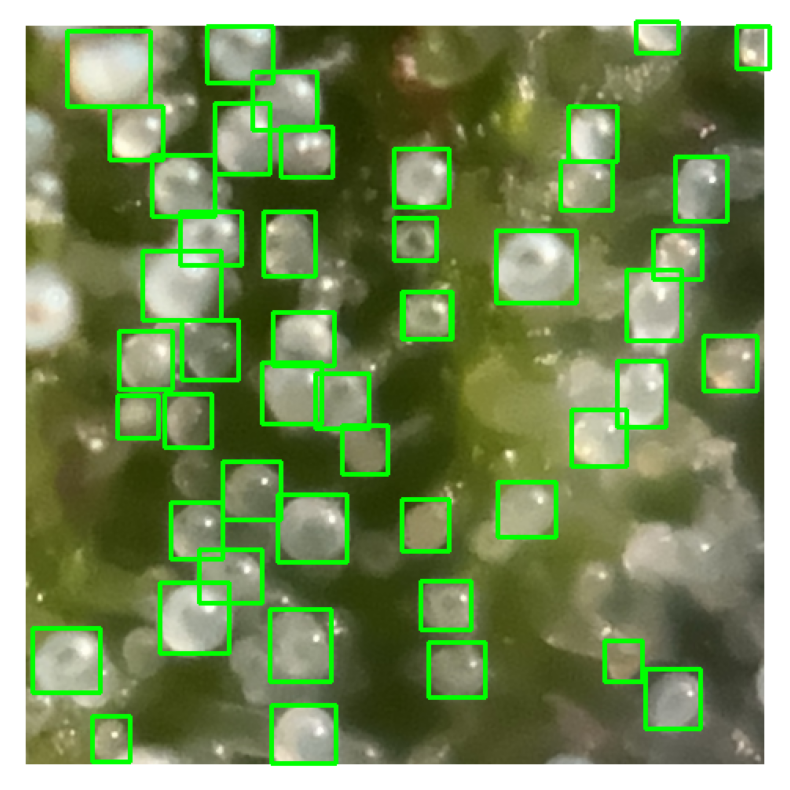

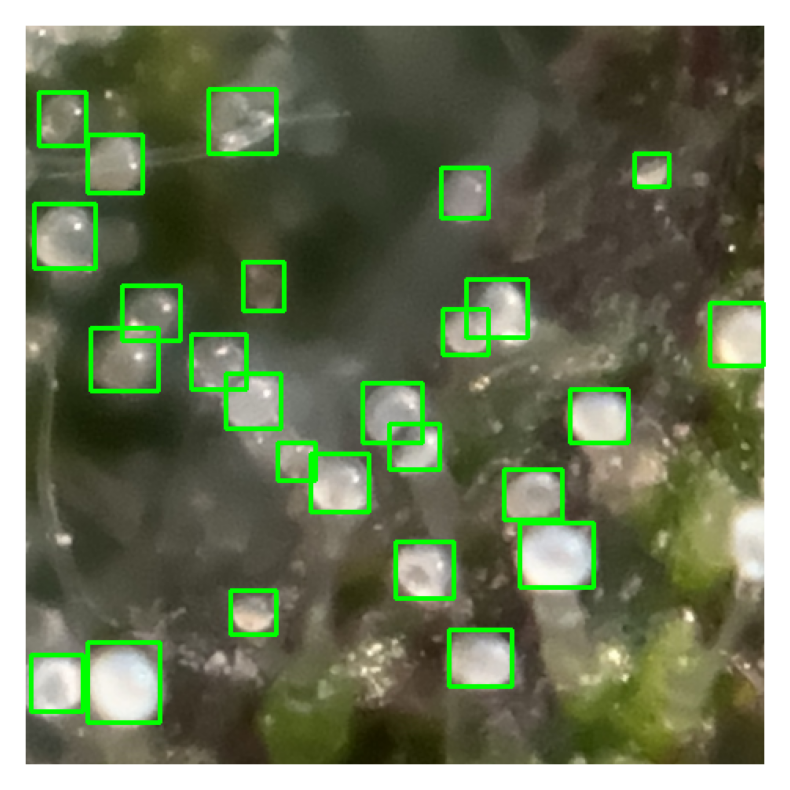

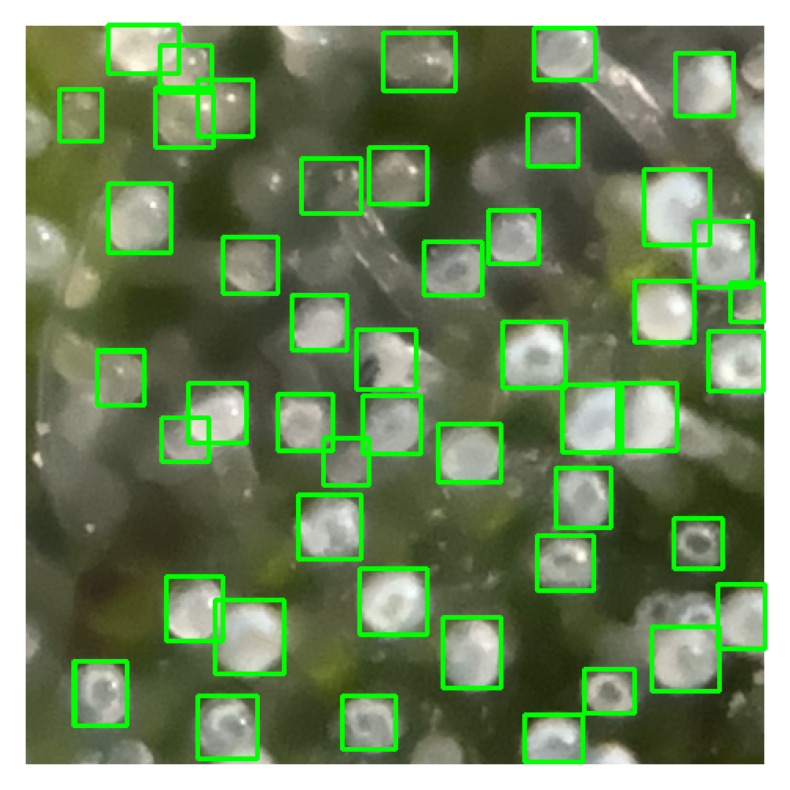

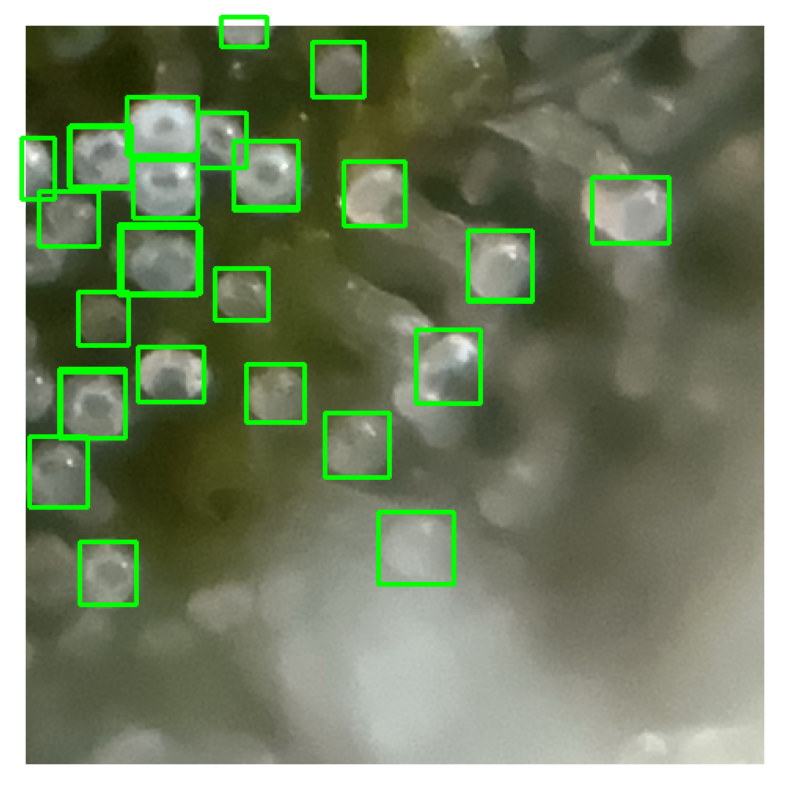

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

# --- Load the model configuration and weights ---
# Update these paths if you want to use your other model (e.g., instance segmentation)
config_yaml_path = "/home/etaylor/code_projects/thesis/checkpoints/trichomes_detection/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml"
checkpoint_path = "/home/etaylor/code_projects/thesis/checkpoints/trichomes_detection/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth"

cfg = get_cfg()
cfg.merge_from_file(config_yaml_path)
cfg.MODEL.WEIGHTS = checkpoint_path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set your desired threshold

predictor = DefaultPredictor(cfg)

# --- Set up directories ---
# Folder containing the images to run inference on
image_dir = "/home/etaylor/code_projects/thesis/non_filtered_patches"
# Valid image extensions
valid_exts = [".jpg", ".jpeg", ".png", ".bmp"]
# Get list of image file paths
image_files = [
    os.path.join(image_dir, f)
    for f in os.listdir(image_dir)
    if os.path.splitext(f)[1].lower() in valid_exts
]

# Optional: Create an output directory to save the images with detections
output_dir = os.path.join(image_dir, "detections")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# --- Loop over images, run inference, and plot ---
for image_path in image_files:
    # Read the image using OpenCV
    im = cv2.imread(image_path)
    if im is None:
        print(f"Could not load image: {image_path}")
        continue

    # Run inference
    outputs = predictor(im)

    # If instances and predicted boxes exist, draw them
    if "instances" in outputs and outputs["instances"].has("pred_boxes"):
        # Get the predicted bounding boxes as a NumPy array
        boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()

        # Draw each bounding box using cv2.rectangle.
        # Here, all boxes are drawn with the same color (green) and thickness (2).
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(im, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Convert BGR to RGB for displaying with matplotlib
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.axis("off")
    plt.show()

    # Optionally, save the output image with drawn boxes
    output_path = os.path.join(output_dir, os.path.basename(image_path))
    cv2.imwrite(output_path, im)


Loading config /home/etaylor/code_projects/thesis/checkpoints/trichomes_detection/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
/home/etaylor/.conda/envs/detectron_fastai/lib/python3.9/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


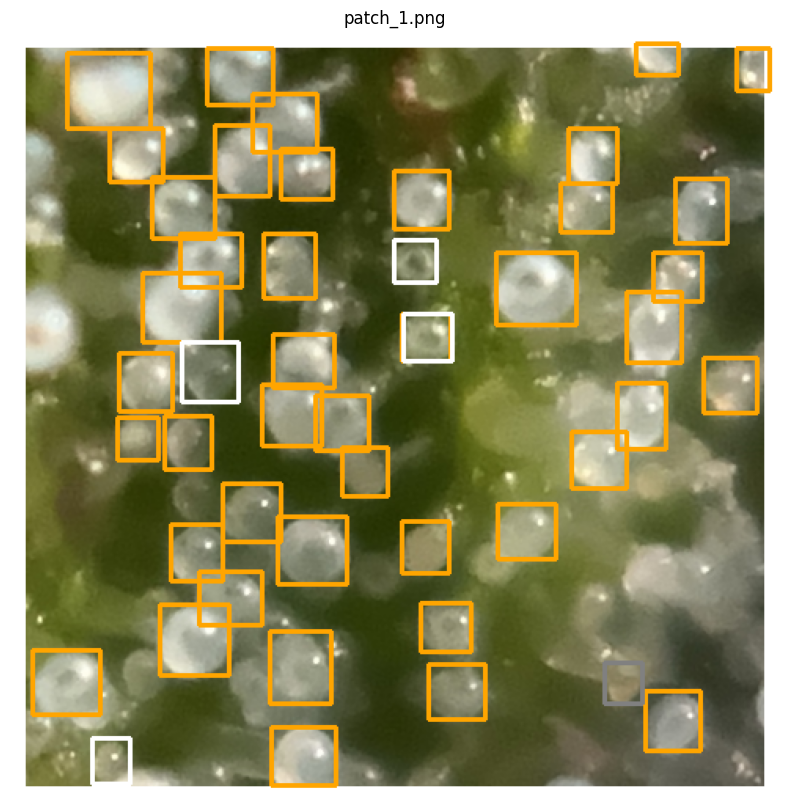

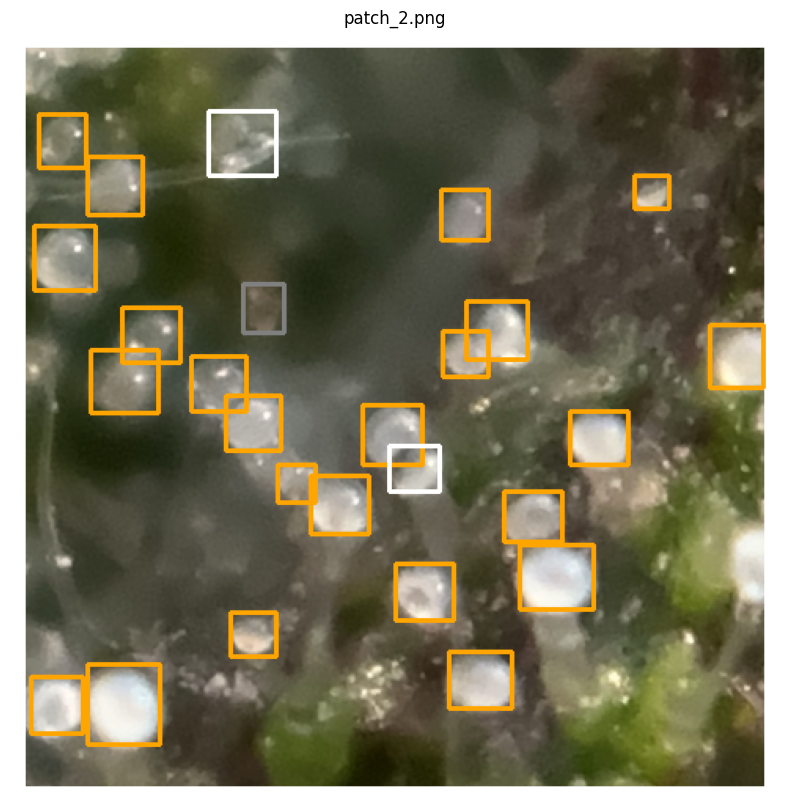

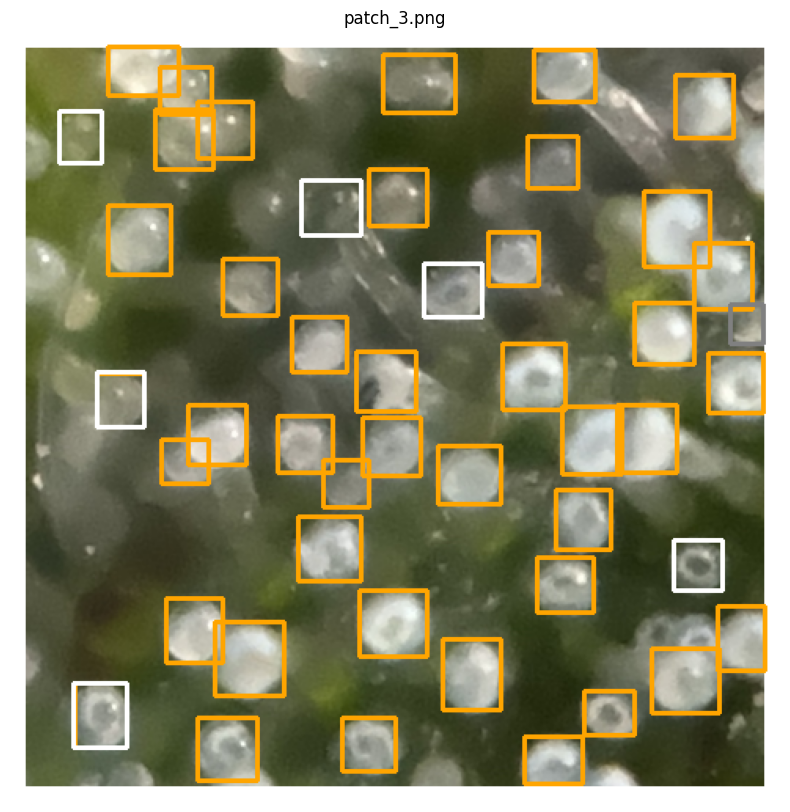

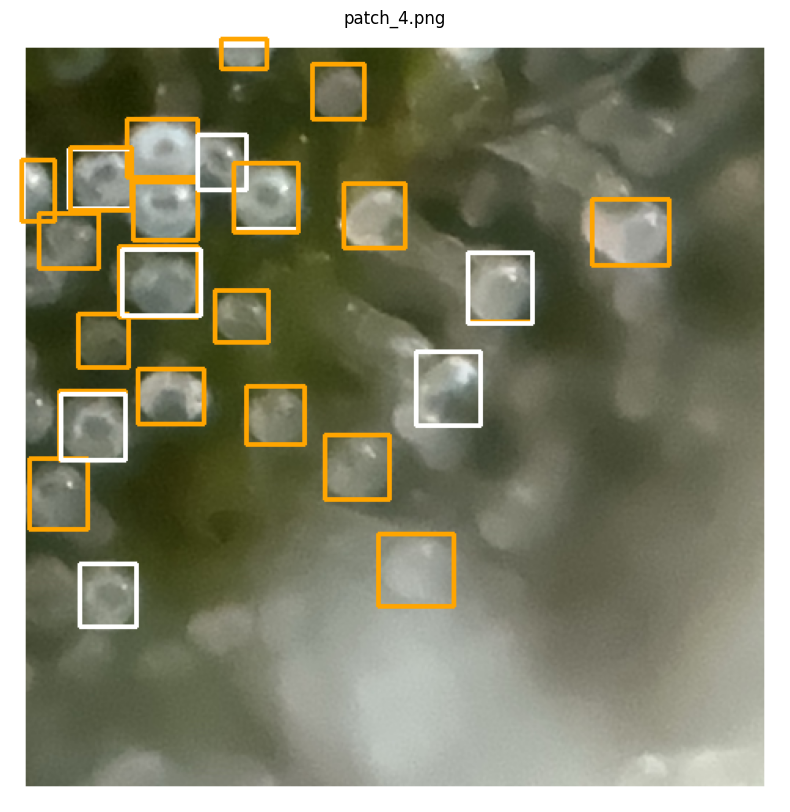

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

# --- Load the model configuration and weights ---
# Update these paths to point to your model config and weights.
config_yaml_path = "/home/etaylor/code_projects/thesis/checkpoints/trichomes_detection/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml"
checkpoint_path = "/home/etaylor/code_projects/thesis/checkpoints/trichomes_detection/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth"

cfg = get_cfg()
cfg.merge_from_file(config_yaml_path)
cfg.MODEL.WEIGHTS = checkpoint_path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set your desired threshold

predictor = DefaultPredictor(cfg)

# --- Define the class and color mapping ---
# Assumes that class indices are:
# 0 -> "clear", 1 -> "cloudy", 2 -> "amber"
class_names = {0: "clear", 1: "cloudy", 2: "amber"}
color_map = {
    "clear": (128, 128, 128),   # Grey in BGR
    "cloudy": (255, 255, 255),  # White in BGR
    "amber": (0, 165, 255)      # Orange in BGR (typical OpenCV orange)
}

# --- Set up directories ---
# Folder containing the images to run inference on
image_dir = "/home/etaylor/code_projects/thesis/non_filtered_patches"
# Valid image extensions
valid_exts = [".jpg", ".jpeg", ".png", ".bmp"]
# Get list of image file paths
image_files = [
    os.path.join(image_dir, f)
    for f in os.listdir(image_dir)
    if os.path.splitext(f)[1].lower() in valid_exts
]

# Optional: Create an output directory to save the images with detections
output_dir = os.path.join(image_dir, "detections")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# --- Loop over images, run inference, and plot ---
for image_path in image_files:
    # Read the image using OpenCV
    im = cv2.imread(image_path)
    if im is None:
        print(f"Could not load image: {image_path}")
        continue

    # Run inference
    outputs = predictor(im)

    # Check if detections exist and get bounding boxes and predicted classes
    if "instances" in outputs and outputs["instances"].has("pred_boxes"):
        boxes = outputs["instances"].pred_boxes.tensor.cpu().numpy()
        # Get predicted class indices (assumed to be integers: 0,1,2)
        pred_classes = outputs["instances"].pred_classes.cpu().numpy()

        # Loop over each detection
        for box, cls_idx in zip(boxes, pred_classes):
            # Look up the class name; default to "clear" if not found
            cls_name = class_names.get(cls_idx, "clear")
            # Get the corresponding color from the mapping; fallback to green if needed
            color = color_map.get(cls_name, (0, 255, 0))
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(im, (x1, y1), (x2, y2), color, 2)

    # Convert from BGR to RGB for displaying with matplotlib
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(im_rgb)
    plt.title(os.path.basename(image_path))
    plt.axis("off")
    plt.show()

    # Optionally, save the output image with drawn boxes
    output_path = os.path.join(output_dir, os.path.basename(image_path))
    cv2.imwrite(output_path, im)
